## [Interpolation](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html#interpolation)

In [1]:
import pandas as pd
import numpy as np

[DataFrame.interpolate()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html#pandas.DataFrame.interpolate) and [Series.interpolate()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.interpolate.html#pandas.Series.interpolate) fills NA values using various interpolation methods.

In [9]:
df = pd.DataFrame(
    {
        "A": [1, 2.1, np.nan, 4.7, 5.6, 6.8],
        "B": [0.25, np.nan, np.nan, 4, 12.2, 14.4],
    }
)
df

,A,B
0,1.0,0.25
1,2.1,NaN
2,NaN,NaN
3,4.7,4.00
4,5.6,12.20
5,6.8,14.40


In [10]:
df.interpolate()

,A,B
0,1.0,0.25
1,2.1,1.50
2,3.4,2.75
3,4.7,4.00
4,5.6,12.20
5,6.8,14.40


In [65]:
idx = pd.date_range("2025-01-01", periods=10, freq='D')
idx

DatetimeIndex(['2025-01-01', '2025-01-02', '2025-01-03', '2025-01-04',
               '2025-01-05', '2025-01-06', '2025-01-07', '2025-01-08',
               '2025-01-09', '2025-01-10'],
              dtype='datetime64[ns]', freq='D')

In [66]:
data = np.random.default_rng(2).integers(0,10,10).astype(np.float64)
data

array([8., 2., 1., 2., 4., 8., 4., 0., 3., 6.])

In [67]:
ts = pd.Series(data, idx)
ts

2025-01-01    8.0
2025-01-02    2.0
2025-01-03    1.0
2025-01-04    2.0
2025-01-05    4.0
2025-01-06    8.0
2025-01-07    4.0
2025-01-08    0.0
2025-01-09    3.0
2025-01-10    6.0
Freq: D, dtype: float64

In [69]:
ts.iloc[[1,2,5,6,9]] = np.nan
ts

2025-01-01    8.0
2025-01-02    NaN
2025-01-03    NaN
2025-01-04    2.0
2025-01-05    4.0
2025-01-06    NaN
2025-01-07    NaN
2025-01-08    0.0
2025-01-09    3.0
2025-01-10    NaN
Freq: D, dtype: float64

<Axes: >

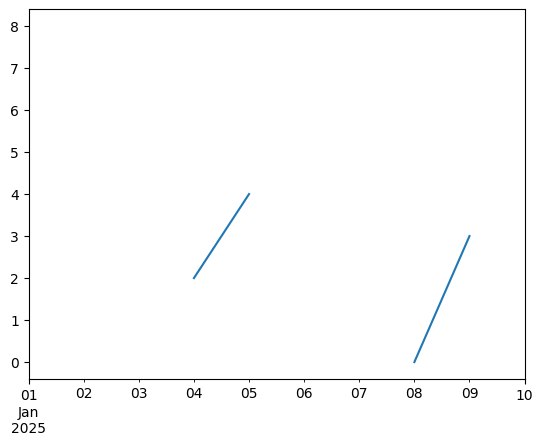

In [70]:
ts.plot()

In [71]:
ts.interpolate()

2025-01-01    8.000000
2025-01-02    6.000000
2025-01-03    4.000000
2025-01-04    2.000000
2025-01-05    4.000000
2025-01-06    2.666667
2025-01-07    1.333333
2025-01-08    0.000000
2025-01-09    3.000000
2025-01-10    3.000000
Freq: D, dtype: float64

<Axes: >

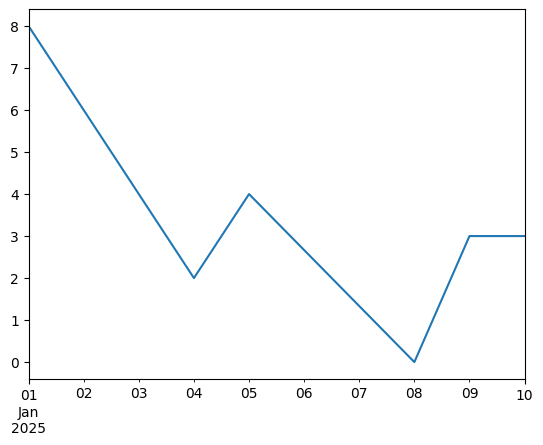

In [72]:
ts.interpolate().plot()

In [74]:
ts2 = ts.iloc[[0,1,3,7,9]]
ts2

2025-01-01    8.0
2025-01-02    NaN
2025-01-04    2.0
2025-01-08    0.0
2025-01-10    NaN
dtype: float64

In [75]:
ts2.interpolate()

2025-01-01    8.0
2025-01-02    5.0
2025-01-04    2.0
2025-01-08    0.0
2025-01-10    0.0
dtype: float64

In [77]:
ts2.interpolate(method='time')

2025-01-01    8.0
2025-01-02    6.0
2025-01-04    2.0
2025-01-08    0.0
2025-01-10    0.0
dtype: float64

For a floating-point index, use `method='values'`:

In [82]:
idx = [0.0, 1.0, 10.0, 4.0]
ser = pd.Series([0.0, np.nan, 10.0, np.nan], idx)
ser

0.0      0.0
1.0      NaN
10.0    10.0
4.0      NaN
dtype: float64

In [83]:
ser.interpolate()

0.0      0.0
1.0      5.0
10.0    10.0
4.0     10.0
dtype: float64

In [84]:
ser.interpolate(method='values')

0.0      0.0
1.0      1.0
10.0    10.0
4.0      4.0
dtype: float64

If you are dealing with a time series that is growing at an increasing rate, use `method='barycentric'`.

If you have values approximating a cumulative distribution function, use `method='pchip'`.

To fill missing values with goal of smooth plotting use `method='akima'`.

In [85]:
df = pd.DataFrame(
   {
      "A": [1, 2.1, np.nan, 4.7, 5.6, 6.8],
      "B": [0.25, np.nan, np.nan, 4, 12.2, 14.4],
   }
)
df

,A,B
0,1.0,0.25
1,2.1,NaN
2,NaN,NaN
3,4.7,4.00
4,5.6,12.20
5,6.8,14.40


In [87]:
df.interpolate(method='barycentric')

,A,B
0,1.00,0.250
1,2.10,-7.660
2,3.53,-4.515
3,4.70,4.000
4,5.60,12.200
5,6.80,14.400


In [88]:
df.interpolate(method='pchip')

,A,B
0,1.00000,0.250000
1,2.10000,0.672808
2,3.43454,1.928950
3,4.70000,4.000000
4,5.60000,12.200000
5,6.80000,14.400000


In [89]:
df.interpolate('akima')

,A,B
0,1.000000,0.250000
1,2.100000,-0.873316
2,3.406667,0.320034
3,4.700000,4.000000
4,5.600000,12.200000
5,6.800000,14.400000


Comparing several methods.

In [122]:
np.random.seed(2)
ser = pd.Series(np.arange(1,10.1,0.25)*2 + np.random.randn(37))
missing = np.array([4, 13, 14, 15, 16, 17, 18, 20, 29])
ser.iloc[missing] = np.nan
metho = ['linear', 'quadratic', 'cubic']
df = pd.DataFrame({m : ser.interpolate(method=m) for m in metho})
df

,linear,quadratic,cubic
0,1.583242,1.583242,1.583242
1,2.443733,2.443733,2.443733
2,0.863804,0.863804,0.863804
3,5.140271,5.140271,5.140271
4,4.399262,4.935212,4.980575
5,3.658253,3.658253,3.658253
6,5.502881,5.502881,5.502881
7,4.254712,4.254712,4.254712
8,4.942048,4.942048,4.942048
9,5.590992,5.590992,5.590992


<Axes: >

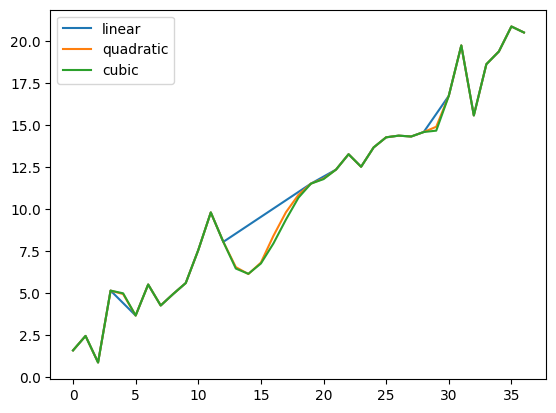

In [123]:
df.plot()

Interpolating new observations from expanding data with [`Series.reindex()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.reindex.html#pandas.Series.reindex).

In [152]:
np.random.seed(2)
ser = pd.Series(np.sort(np.random.uniform(size=100)))
new_index = ser.index.union(pd.Index([49.25, 49.5, 49.75, 50.25, 50.5, 50.75]))
interp_s = ser.reindex(new_index).interpolate(method='pchip')
interp_s.loc[49:51]


49.00    0.435995
49.25    0.436152
49.50    0.436298
49.75    0.436481
50.00    0.436747
50.25    0.437281
50.50    0.438232
50.75    0.439592
51.00    0.441355
dtype: float64

## [Interpolation limits](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html#interpolation-limits)
[`interpolate()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html#pandas.DataFrame.interpolate) accepts a limit keyword argument to limit the number of consecutive NaN values filled since the last valid observation

In [161]:
ser = pd.Series([np.nan, np.nan, 5, np.nan, np.nan, np.nan, 13, np.nan, np.nan])
ser

0     NaN
1     NaN
2     5.0
3     NaN
4     NaN
5     NaN
6    13.0
7     NaN
8     NaN
dtype: float64

In [162]:
ser.interpolate()

0     NaN
1     NaN
2     5.0
3     7.0
4     9.0
5    11.0
6    13.0
7    13.0
8    13.0
dtype: float64

In [163]:
ser.interpolate(limit_direction='backward')

0     5.0
1     5.0
2     5.0
3     7.0
4     9.0
5    11.0
6    13.0
7     NaN
8     NaN
dtype: float64

In [164]:
ser.interpolate(limit=1)

0     NaN
1     NaN
2     5.0
3     7.0
4     NaN
5     NaN
6    13.0
7    13.0
8     NaN
dtype: float64

In [165]:
ser.interpolate(limit=1, limit_direction='backward')

0     NaN
1     5.0
2     5.0
3     NaN
4     NaN
5    11.0
6    13.0
7     NaN
8     NaN
dtype: float64

In [166]:
ser.interpolate(limit_direction='both')

0     5.0
1     5.0
2     5.0
3     7.0
4     9.0
5    11.0
6    13.0
7    13.0
8    13.0
dtype: float64

In [168]:
ser

0     NaN
1     NaN
2     5.0
3     NaN
4     NaN
5     NaN
6    13.0
7     NaN
8     NaN
dtype: float64

In [167]:
ser.interpolate(limit=1, limit_direction='both')

0     NaN
1     5.0
2     5.0
3     7.0
4     NaN
5    11.0
6    13.0
7    13.0
8     NaN
dtype: float64

By default, `NaN` values are filled whether they are surrounded by existing valid values or outside existing valid values. The  limit_area` parameter restricts filling to either inside or outside values.

In [170]:
ser

0     NaN
1     NaN
2     5.0
3     NaN
4     NaN
5     NaN
6    13.0
7     NaN
8     NaN
dtype: float64

In [173]:
# fill one consecutive inside value in both directions
ser.interpolate(limit_direction='both',limit_area='inside', limit=1)

0     NaN
1     NaN
2     5.0
3     7.0
4     NaN
5    11.0
6    13.0
7     NaN
8     NaN
dtype: float64

In [175]:
# fill all consecutive outside values backward
ser.interpolate(limit_direction='backward', limit_area='outside', limit=1)

0     NaN
1     5.0
2     5.0
3     NaN
4     NaN
5     NaN
6    13.0
7     NaN
8     NaN
dtype: float64

In [176]:
# fill all consecutive outside values in both directions
ser.interpolate(limit_direction='both', limit_area='outside')

0     5.0
1     5.0
2     5.0
3     NaN
4     NaN
5     NaN
6    13.0
7    13.0
8    13.0
dtype: float64